# Project Work
This project is composed from two dataset:
- Lipidoma
- Metaboloma

The aim of this project is identify bio-markers that allow to distinguish the evolution of pathology (HCV). We have 3 several class of patient:
- LC: Hepatocellular carcinoma
- HC: Hepatitis C virus
- MC: Mixed Cryoglobulinemia disease

## Metaboloma

### Read Data Set

In [1]:
import pandas as pd
import numpy as np

data_metaboloma_transpose = pd.read_excel("DataSet PAscale/Metaboloma.xlsx")
data_metaboloma_transpose

data_metaboloma = data_metaboloma_transpose.T

data_metaboloma.columns = data_metaboloma_transpose["Sample"]

data_metaboloma = data_metaboloma.iloc[1:]

data_metaboloma.columns = list(data_metaboloma.columns)

df_y_metaboloma = data_metaboloma["Label"].iloc[1:]

mz_metaboloma = data_metaboloma.iloc[0:1,1:]

df_y_qc_metaboloma = data_metaboloma["Label"].iloc[1:5]

df_x_metaboloma = data_metaboloma.iloc[1:,1:]

df_qc_metaboloma = data_metaboloma.iloc[1:5]

name_samples_metaboloma = df_x_metaboloma.transpose().columns

df_x_metaboloma

,Aminooctanoic acid,Androsterone sulfate,Arachidonic acid,Arginine,Asymmetric dimethylarginine,Bilirubin,Biliverdin,CAR 10:0,CAR 10:1,CAR 14:1,...,Paraxanthine,Phenylacetylglutamine,Pregnenolone sulfate,Proline betaine,Proline-hydroxyproline,Pseudouridine,Sphingosine 1-phosphate,Taurine,Tyrosine,Urobilinogen
260522_QC 3uL POS_BA2_1_5281,1724.36,36169.2,1791.64,20815.31,18192.06,2352.46,3163.69,41893.68,20112.96,13712.3,...,25095.15,11855.6,7784.79,63059.26,4441.94,2532.3,370.53,4797.76,1558.59,10739.38
260522_QC 3uL POS_BA2_1_5282,2069.33,NaN,2686.61,18423.92,16191.01,2867.38,2492.91,45853.77,22089.3,13680.64,...,26118.44,12851.29,8463.23,59114.21,4312.64,2706.49,547.05,4898.68,2369.34,10762.16
260522_QC 3uL POS_BA2_1_5292,2345.91,36445.49,1934.77,18134.45,16500.87,2068.57,2921.83,40248.9,20480.08,14949.6,...,34265.84,16378.96,9249.89,58846.07,4322.24,2988.95,480.28,4262.75,1780.54,10415.68
260522_QC 3uL POS_BA2_1_5336,2800.96,48072.08,2338.6,NaN,18163.49,1626.92,2426.26,38664.73,19663.5,14294.55,...,32695.32,13010.66,11141.93,68917.94,4249.72,2369.77,604.94,3894.54,1470.27,8576.66
260522_LC 203_POS_BA3_1_5284,5593.8,8391.23,2555.37,23541.71,25006.24,20973.29,11433.02,101834.45,27948.15,20205.67,...,59383.52,24228.53,2319.81,11698.76,5601.15,2336.02,920.18,4491.4,3273.71,893.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260522_HC 019_POS_GE8_1_5367,5082.13,71447.89,2195.48,11581.65,11746.75,2378.9,1772.48,62455.74,40757.8,11739.01,...,95740.05,22130.71,10216.19,16960.19,4379.81,2054.49,1658.98,3282.69,1720.11,1485.28
260522_HC 020_POS_RA1_1_5368,2560.8,6213.98,2240.19,19817.97,15440.64,3008.33,2334.52,119343.25,55534.63,24819.22,...,43309.66,27068.33,5982.11,8025.66,7901.4,3315.97,981.54,2643.4,2377.65,2736.38
260522_HC 021_POS_RA7_1_5375,4378.68,NaN,826.61,7058.17,14720.29,5098.76,3060.99,160972.44,40101.87,12816.22,...,31221.78,27424.89,3857.13,74973.58,4896.98,3970.25,766.7,3415.74,2796.12,8934.25
260522_HC 022_POS_RA8_1_5376,3584.63,106970.46,2322.56,16072.35,15300.35,8262.55,4217.25,75388.84,25210.08,13802.58,...,99036.48,16814.4,10656.49,45065.14,2711.33,2925.63,587.06,4154.92,1176.92,3078.14


In [2]:
# color mapping to use in plot
color_mapping = {
    'LC': 'red',
    'MC': 'green',
    'HC' : 'orange',
    'QC' : 'purple'
}

colors = [color_mapping[label] for label in df_y_metaboloma]

### View the data

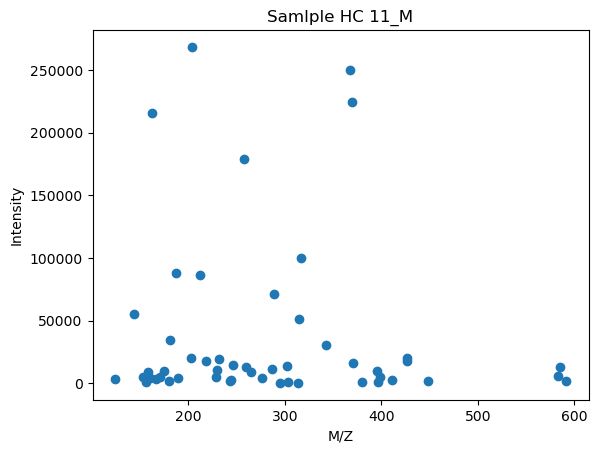

260522_HC 07_POS_BD8_1_5315    268301.44
dtype: object


In [3]:
import matplotlib.pyplot as plt

plt.scatter(mz_metaboloma, df_x_metaboloma.iloc[89:90])
plt.xlabel("M/Z")
plt.ylabel("Intensity")
plt.title("Samlple HC 11_M")
plt.show()
# axis=1 sono le righe; axis=0 sono le colonne
print(df_x_metaboloma[89:90].max(axis=1))


In [4]:
df_x_metaboloma_original = df_x_metaboloma.copy()
for column in df_x_metaboloma.columns:
    df_x_metaboloma.loc[:,column] = df_x_metaboloma[column].fillna((np.nanmin(df_x_metaboloma[column]))/5)
print(df_x_metaboloma.isna().sum().sort_values(ascending=False))

Aminooctanoic acid                    0
Dehydroepiandrosterone sulfate        0
Dodecenoylcarnitine                   0
FA 18:1+1O                            0
Glycerophosphocholine                 0
Histidine                             0
Homoarginine                          0
Hydroperoxylinoleic acid              0
Hydroxyanthranilic acid               0
Hydroxypregnenolone sulfate           0
INDOLE-ACETALDEHYDE                   0
Indoxyl sulfate                       0
Isoleucylproline                      0
Methylguanine                         0
Methylhistidine                       0
Methylpyridonecarboxamide             0
Paraxanthine                          0
Phenylacetylglutamine                 0
Pregnenolone sulfate                  0
Proline betaine                       0
Proline-hydroxyproline                0
Pseudouridine                         0
Sphingosine 1-phosphate               0
Taurine                               0
Tyrosine                              0


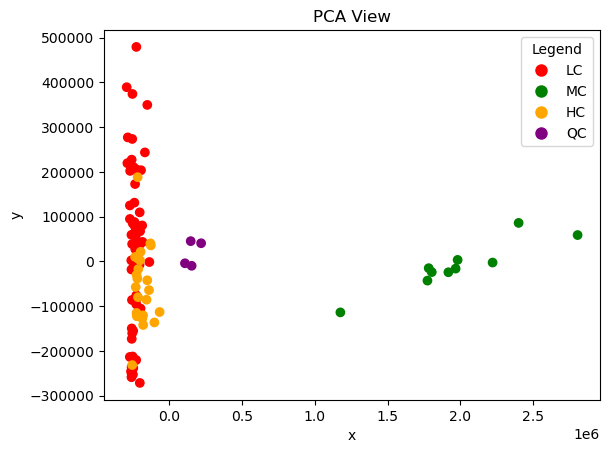

In [5]:
from sklearn.decomposition import PCA
pca_view = PCA(n_components=2)

scores_view = pca_view.fit_transform(df_x_metaboloma,df_y_metaboloma)


plt.scatter(scores_view[:, 0], scores_view[:, 1], c=colors)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', label='LC', markerfacecolor='red', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='MC', markerfacecolor='green', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='HC', markerfacecolor='orange', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='QC', markerfacecolor='purple', markersize=10),
], title='Legend')
plt.title('PCA View')
plt.show()



### TIC Normalization

CAR 16:1_B                            23
Tyrosine                              22
CAR 16:2                              20
Hydroxyanthranilic acid               19
CAR 16:1_A                            18
Hydroxypregnenolone sulfate           17
Deoxycholic acid glycine conjugate    15
Taurine                               15
CAR 3:0                               14
Hydroperoxylinoleic acid              14
CAR 18:1_A                            13
Methylhistidine                       12
Pseudouridine                         12
Urobilinogen                          12
CAR 18:1_B                            11
Arachidonic acid                      11
CAR 5:1;O2                            10
FA 18:1+1O                             9
Aminooctanoic acid                     9
Pregnenolone sulfate                   8
Biliverdin                             7
CAR 9:0                                7
Androsterone sulfate                   7
CAR 8:1                                6
Sphingosine 1-ph

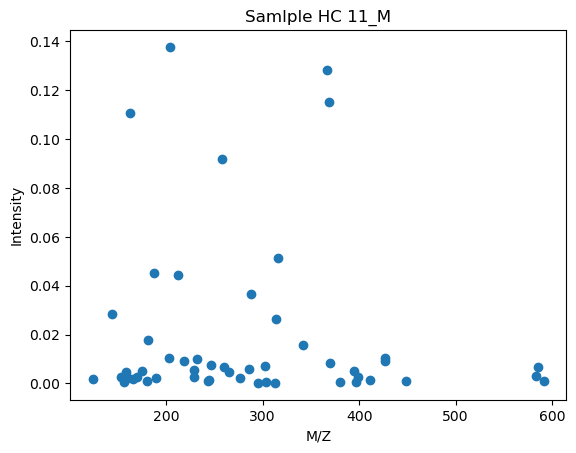

260522_HC 07_POS_BD8_1_5315    0.137752
dtype: object

In [6]:
# normalization with  original dataset
print(df_x_metaboloma_original.isna().sum().sort_values(ascending=False))

tic_original = df_x_metaboloma_original.sum(axis=1, skipna=True)
df_x_metaboloma_original_tic = df_x_metaboloma_original.div(tic_original,axis=0)

plt.scatter(mz_metaboloma, df_x_metaboloma_original_tic.iloc[89:90])
plt.xlabel("M/Z")
plt.ylabel("Intensity")
plt.title("Samlple HC 11_M")
plt.show()
# axis=1 sono le righe; axis=0 sono le colonne
df_x_metaboloma_original_tic[89:90].max(axis=1)


Aminooctanoic acid                    0
Dehydroepiandrosterone sulfate        0
Dodecenoylcarnitine                   0
FA 18:1+1O                            0
Glycerophosphocholine                 0
Histidine                             0
Homoarginine                          0
Hydroperoxylinoleic acid              0
Hydroxyanthranilic acid               0
Hydroxypregnenolone sulfate           0
INDOLE-ACETALDEHYDE                   0
Indoxyl sulfate                       0
Isoleucylproline                      0
Methylguanine                         0
Methylhistidine                       0
Methylpyridonecarboxamide             0
Paraxanthine                          0
Phenylacetylglutamine                 0
Pregnenolone sulfate                  0
Proline betaine                       0
Proline-hydroxyproline                0
Pseudouridine                         0
Sphingosine 1-phosphate               0
Taurine                               0
Tyrosine                              0


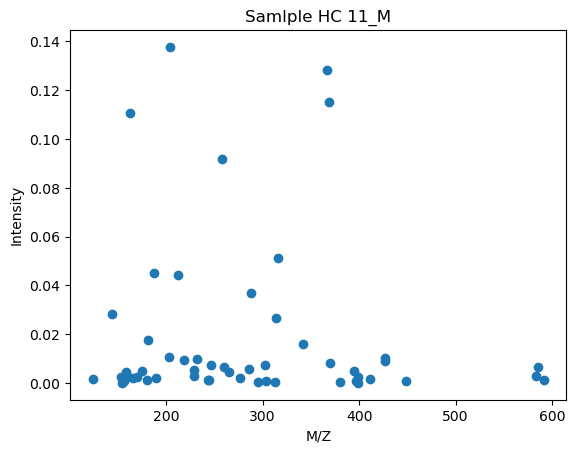

260522_HC 07_POS_BD8_1_5315    0.137752
dtype: object

In [7]:
print(df_x_metaboloma.isna().sum().sort_values(ascending=False))

df_x_metaboloma_tic = df_x_metaboloma.div(tic_original,axis=0)

plt.scatter(mz_metaboloma, df_x_metaboloma_tic.iloc[89:90])
plt.xlabel("M/Z")
plt.ylabel("Intensity")
plt.title("Samlple HC 11_M")
plt.show()
# axis=1 sono le righe; axis=0 sono le colonne
df_x_metaboloma_tic[89:90].max(axis=1)

#### View after normalization

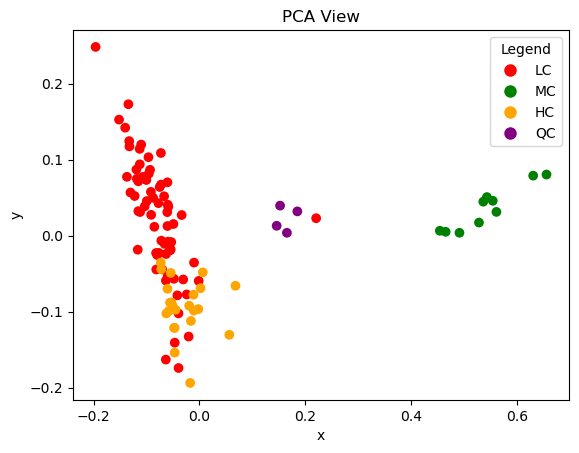

In [8]:
pca_view = PCA(n_components=2)

scores_view = pca_view.fit_transform(df_x_metaboloma_tic,df_y_metaboloma)


plt.scatter(scores_view[:, 0], scores_view[:, 1], c=colors)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', label='LC', markerfacecolor='red', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='MC', markerfacecolor='green', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='HC', markerfacecolor='orange', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='QC', markerfacecolor='purple', markersize=10),
], title='Legend')
plt.title('PCA View')
plt.show()

#### Drop outlier

In [9]:
drop = []

LC

In [10]:
lc = scores_view[4:73,:]

mean_lc = np.mean(lc,axis=0)
cov_matrix = np.cov(lc,rowvar=False)

mahalanobis_distance_lc = []

for point in lc:
    diff = point - mean_lc
    distance = np.sqrt(np.dot(np.dot(diff, np.linalg.inv(cov_matrix)), diff))
    mahalanobis_distance_lc.append(distance)

outlier_lc = pd.DataFrame({"Sample":df_x_metaboloma_tic.index[4:73],"outlier":mahalanobis_distance_lc}).sort_values(by="outlier",ascending=False)
outlier_lc

,Sample,outlier
67,260522_LC 443_POS_RC7_1_5391,6.954893
34,260522_LC 365_POS_GC2_1_5344,2.956510
66,260522_LC 442_POS_RC6_1_5390,2.669822
60,260522_LC 431_POS_RB8_1_5384,2.622904
68,260522_LC 447_POS_RC8_1_5392,2.187773
...,...,...
36,260522_LC 367_POS_GC4_1_5346,0.350024
12,260522_LC 306_POS_BC5_1_5304,0.317334
25,260522_LC 341_POS_GA3_1_5327,0.315691
8,260522_LC 262_POS_BB6_1_5297,0.286145


In [11]:
mean_out_lc = outlier_lc["outlier"].mean(axis=0)
temp = []
for sample,elem in outlier_lc.values:
    if elem > (mean_out_lc*3):
        drop.append(sample)
        temp.append(sample)

outlier_lc = outlier_lc.drop(outlier_lc[outlier_lc["Sample"].isin(temp)].index)        

drop

['260522_LC 443_POS_RC7_1_5391']

MC

In [12]:
mc = scores_view[73:83,:]

mean_mc = np.mean(mc,axis=0)
cov_matrix = np.cov(mc,rowvar=False)

mahalanobis_distance_mc = []

for point in mc:
    diff = point - mean_mc
    distance = np.sqrt(np.dot(np.dot(diff, np.linalg.inv(cov_matrix)), diff))
    mahalanobis_distance_mc.append(distance)
    
# print(mahalanobis_distance_mc)

outlier_mc = pd.DataFrame({"Sample":df_x_metaboloma_tic.index[73:83],"outlier":mahalanobis_distance_mc}).sort_values(by="outlier",ascending=False)
outlier_mc

,Sample,outlier
0,260522_MC 04_POS_BA7_1_5288,1.790993
2,260522_MC 09_POS_BC7_1_5306,1.508221
1,260522_MC 05_POS_BB7_1_5298,1.477800
5,260522_MC 13_POS_GA7_1_5331,1.395059
6,260522_MC 14_POS_GB7_1_5341,1.385663
8,260522_MC 17_POS_GD7_1_5358,1.365259
9,260522_MC 18_POS_GE7_1_5366,1.350548
7,260522_MC 15_POS_GC7_1_5349,1.188348
3,260522_MC 10_POS_BD7_1_5314,1.068617
4,260522_MC 11_POS_BE7_1_5323,0.474811


In [13]:
mean_out_mc = outlier_mc["outlier"].mean(axis=0)
temp = []
for sample,elem in outlier_mc.values:
    if elem > (mean_out_mc*3):
        drop.append(sample)
        temp.append(sample)
        
outlier_mc = outlier_mc.drop(outlier_mc[outlier_mc["Sample"].isin(temp)].index)

drop

['260522_LC 443_POS_RC7_1_5391']

HC

In [14]:
hc = scores_view[83:106,:]

mean_hc = np.mean(hc,axis=0)
cov_matrix = np.cov(hc,rowvar=False)

mahalanobis_distance_hc = []

for point in hc:
    diff = point - mean_hc
    distance = np.sqrt(np.dot(np.dot(diff, np.linalg.inv(cov_matrix)), diff))
    mahalanobis_distance_hc.append(distance)
    
# print(mahalanobis_distance_hc)

outlier_hc = pd.DataFrame({"Sample":df_x_metaboloma_tic.index[83:106],"outlier":mahalanobis_distance_hc}).sort_values(by="outlier",ascending=False)
outlier_hc

,Sample,outlier
2,260522_HC 03_POS_BB8_1_5299,2.801376
7,260522_HC 08_POS_BE1_1_5316,2.758725
1,260522_HC 02_POS_BB1_1_5290,2.396235
5,260522_HC 06_POS_BD1_1_5308,1.868173
16,260522_HC 017_POS_GD8_1_5359,1.795092
19,260522_HC 020_POS_RA1_1_5368,1.672771
4,260522_HC 05_POS_BC8_1_5307,1.655625
14,260522_HC 015_POS_GC8_1_5350,1.324092
22,260522_HC 023_POS_RB1_1_5377,1.133476
17,260522_HC 018_POS_GE1_1_5360,0.995547


In [15]:
mean_out_hc = outlier_hc["outlier"].mean(axis=0)

temp = []
for sample,elem in outlier_hc.values:
    if elem > (mean_out_hc*3):
        drop.append(sample)
        temp.append(sample)

outlier_hc = outlier_hc.drop(outlier_hc[outlier_hc["Sample"].isin(temp)].index) 
drop

['260522_LC 443_POS_RC7_1_5391']

Delete and view the data

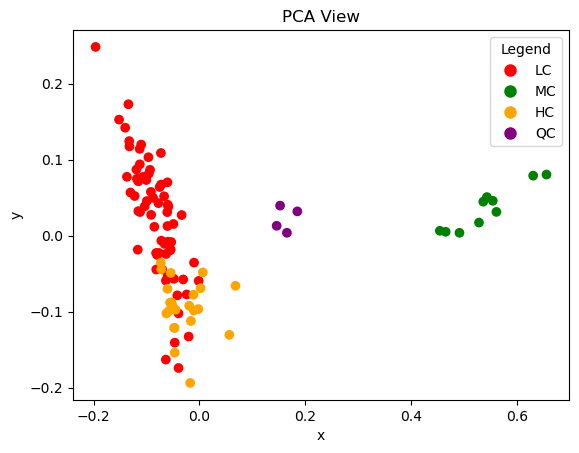

In [16]:
df_score_view = pd.DataFrame({"Sample":df_x_metaboloma_tic.index,"Score View X":scores_view[:,0], "Score View Y":scores_view[:,1]})

index_drop = df_score_view[df_score_view["Sample"].isin(drop)].index
colors_after_drop = np.delete(colors,index_drop)
df_score_view = df_score_view.drop(index_drop)
df_score_view

plt.scatter(df_score_view["Score View X"], df_score_view["Score View Y"], c=colors_after_drop)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', label='LC', markerfacecolor='red', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='MC', markerfacecolor='green', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='HC', markerfacecolor='orange', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='QC', markerfacecolor='purple', markersize=10),
], title='Legend')
plt.title('PCA View')
plt.show()

#### Define X and Y

Label
LC    69
HC    23
MC    10
Name: count, dtype: int64
Label
LC    68
HC    23
MC    10
Name: count, dtype: int64


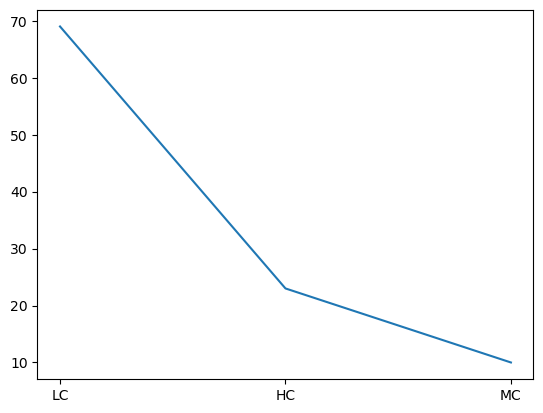

In [17]:
df_x_metaboloma_tic_noqc = df_x_metaboloma_tic.iloc[4:]
df_y_metaboloma_noqc = df_y_metaboloma.iloc[4:]

print(df_y_metaboloma_noqc.value_counts())

x_tic = df_x_metaboloma_tic_noqc.copy()
y_tic = df_y_metaboloma_noqc.copy()

x_tic = x_tic.drop(drop)
y_tic = y_tic.drop(drop)
print(y_tic.value_counts())

name_x_tic = x_tic.transpose().columns

plt.plot(df_y_metaboloma_noqc.value_counts())
plt.show()

#### Save the mean and standard deviation of the training set

In [18]:
mean_tic= x_tic.mean(axis=0)
std_tic = x_tic.std(axis=0)

x_tic = (x_tic.sub(mean_tic,axis=1)).div(std_tic,axis=1)

#### Elbow Graph

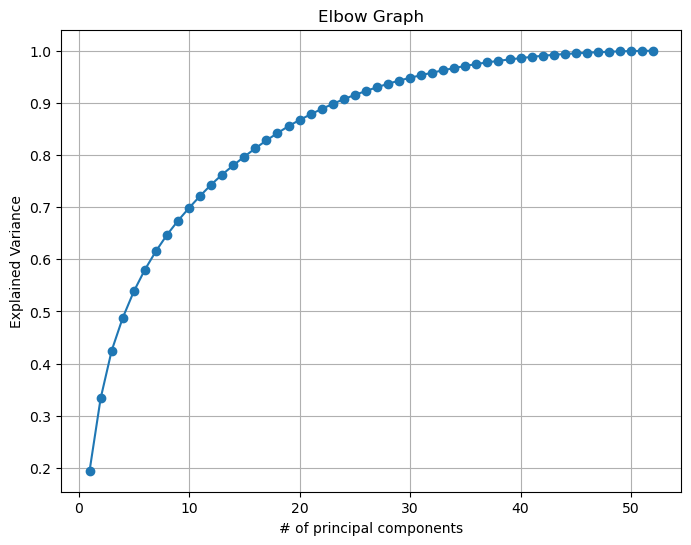

In [19]:
from sklearn.decomposition import PCA

varianza_spiegata_tic = []
n_componenti_tic = np.arange(1, 53)

for n in n_componenti_tic:
    pca_elbow = PCA(n_components=n)
    pca_elbow.fit(x_tic)
    varianza_spiegata_tic.append(np.sum(pca_elbow.explained_variance_ratio_))

plt.figure(figsize=(8, 6))
plt.plot(n_componenti_tic, varianza_spiegata_tic, marker='o')
plt.xlabel('# of principal components')
plt.ylabel('Explained Variance')
plt.title('Elbow Graph')
plt.grid(True)
plt.show()

#### PCA

In [20]:
pca_tic = PCA(n_components=40)
pca_tic_fit= pca_tic.fit(x_tic)
x_tic_pca = pca_tic_fit.transform(x_tic)

#### Pre Models

In [21]:
from imblearn.over_sampling import BorderlineSMOTE
X_w_tic = pd.DataFrame(x_tic_pca)
Y_w_tic = y_tic

X_w_tic.columns = [f'PC{i}' for i in range(X_w_tic.shape[1])]
X_w_tic = X_w_tic.transpose()
X_w_tic.columns = name_x_tic
X_w_tic = X_w_tic.transpose()

all_performance = []

#ribilanciamento
bls = BorderlineSMOTE(random_state=99)
x,y = bls.fit_resample(X_w_tic,Y_w_tic)

##### Fit the Logistic Regression model

In [22]:
from sklearn.linear_model import LogisticRegression

FinalModel = LogisticRegression(penalty='l2', C=0.9, class_weight='balanced', multi_class='auto',max_iter=10000, n_jobs=4, solver='saga')
    
FinalModel.fit(x, y)

FinalModel

LogisticRegression(C=0.9, class_weight='balanced', max_iter=10000, n_jobs=4,
                   solver='saga')

##### Fit the SVM model

In [23]:
from sklearn.svm import SVC
from imblearn.over_sampling import BorderlineSMOTE

SVM_models =  SVC(C=0.9,kernel="linear")

SVM_models.fit(x,y)

SVM_models

SVC(C=0.9, kernel='linear')

##### Fit the RandomForest models

In [24]:
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(n_estimators=200, random_state=3, max_depth=22, n_jobs=4)
RF_model.fit(x, y)

RF_model

RandomForestClassifier(max_depth=22, n_estimators=200, n_jobs=4, random_state=3)

## Analyze the model

#### Logistic Regression

In [25]:
features_importance = pd.DataFrame({"PC": FinalModel.feature_names_in_, "Coefficient": abs(FinalModel.coef_[0])})

name_pc = features_importance.T.columns

features_imp_original = pd.DataFrame({"Feature": x_tic.columns,**{f"PC{i}":abs(pca_tic_fit.components_[i])for i in name_pc}})
features_imp_original
temp = features_imp_original.T
temp.columns = x_tic.columns
temp_2 = temp.T
features_imp_original = temp_2.iloc[:,1:]

out_logistic_regression = np.dot(features_imp_original,(features_importance["Coefficient"] * pca_tic_fit.explained_variance_ratio_))
out_logistic_regression

most_important_features_lr = pd.DataFrame({"LogisticRegression":out_logistic_regression})
most_important_features_lr.index = features_imp_original.index

most_important_features = pd.DataFrame({"Features":x_tic.columns,"LogisticRegression":out_logistic_regression})
most_important_features

most_important_features_lr

,LogisticRegression
Aminooctanoic acid,0.032807
Androsterone sulfate,0.032416
Arachidonic acid,0.038503
Arginine,0.019943
Asymmetric dimethylarginine,0.024951
Bilirubin,0.027106
Biliverdin,0.036705
CAR 10:0,0.045391
CAR 10:1,0.044112
CAR 14:1,0.022839


#### SVM

In [26]:
features_importance = pd.DataFrame({"PC": SVM_models.feature_names_in_, "Coefficient": abs(SVM_models.coef_[0])})

features_importance.max(axis=0)

name_pc = features_importance.T.columns

features_imp_original = pd.DataFrame({"Feature": x_tic.columns,**{f"PC{i}":abs(pca_tic_fit.components_[i])for i in name_pc}})

temp = features_imp_original.T
temp.columns = x_tic.columns
temp_2 = temp.T
features_imp_original = temp_2.iloc[:,1:]

out_svm = np.dot(features_imp_original,(features_importance["Coefficient"] * pca_tic_fit.explained_variance_ratio_))
out_svm

most_important_features_svm = pd.DataFrame({"Features":x_tic.columns,"SVM":out_svm})
most_important_features_svm.index = features_imp_original.index

most_important_features["SVM"] = out_svm
most_important_features

,Features,LogisticRegression,SVM
0,Aminooctanoic acid,0.032807,0.025402
1,Androsterone sulfate,0.032416,0.023487
2,Arachidonic acid,0.038503,0.029501
3,Arginine,0.019943,0.015128
4,Asymmetric dimethylarginine,0.024951,0.02553
5,Bilirubin,0.027106,0.020882
6,Biliverdin,0.036705,0.028175
7,CAR 10:0,0.045391,0.029419
8,CAR 10:1,0.044112,0.029162
9,CAR 14:1,0.022839,0.024065


#### RandomForest

In [27]:
features_importance = pd.DataFrame({"PC": RF_model.feature_names_in_, "Coefficient": (RF_model.feature_importances_)}).sort_values(by="Coefficient",ascending=False)

features_importance

name_pc = features_importance.T.columns

features_imp_original = pd.DataFrame({"Feature": x_tic.columns,**{f"PC{i}":abs(pca_tic_fit.components_[i])for i in name_pc}})

temp = features_imp_original.T
temp.columns = x_tic.columns
temp_2 = temp.T
features_imp_original = temp_2.iloc[:,1:]
features_imp_original

out_random_forest = np.dot(features_imp_original,(features_importance["Coefficient"] * pca_tic_fit.explained_variance_ratio_))
out_random_forest

most_important_features_rf = pd.DataFrame({"Feature": x_tic.columns,"RandomForest":out_random_forest})
most_important_features_rf.index = features_imp_original.index

most_important_features["RandomForest"] = out_random_forest
most_important_features

,Features,LogisticRegression,SVM,RandomForest
0,Aminooctanoic acid,0.032807,0.025402,0.011102
1,Androsterone sulfate,0.032416,0.023487,0.008352
2,Arachidonic acid,0.038503,0.029501,0.015054
3,Arginine,0.019943,0.015128,0.005913
4,Asymmetric dimethylarginine,0.024951,0.02553,0.011321
5,Bilirubin,0.027106,0.020882,0.008437
6,Biliverdin,0.036705,0.028175,0.013113
7,CAR 10:0,0.045391,0.029419,0.018093
8,CAR 10:1,0.044112,0.029162,0.017656
9,CAR 14:1,0.022839,0.024065,0.008479


# Most Important Features
The list is not in priority order

In [28]:
file_path = "most_important_features.xlsx"
MOST_IMP_RF = most_important_features_rf.sort_values(by="RandomForest", ascending=False).iloc[:20]
MOST_IMP_SVM = most_important_features_svm.sort_values(by="SVM", ascending=False).iloc[:20]
MOST_IMP_LR = most_important_features_lr.sort_values(by="LogisticRegression", ascending=False).iloc[:20]

MOST_IMP_FEATURES = pd.DataFrame({"Features":MOST_IMP_LR.index.intersection(MOST_IMP_SVM.index).intersection(MOST_IMP_RF.index)})
MOST_IMP_FEATURES.to_excel(file_path)

most_important_features_tot = pd.DataFrame({"Feature LG":MOST_IMP_LR.index, "Feature SVM":MOST_IMP_SVM.index, "Feature RF":MOST_IMP_RF.index})
most_important_features_tot.to_excel("most_important_features_tot.xlsx")

MOST_IMP_FEATURES

,Features
0,CAR 10:0
1,CAR 8:0
2,CAR 10:1
3,CAR 6:0
4,Arachidonic acid
5,Methylpyridonecarboxamide
6,Biliverdin
7,Glycerophosphocholine
8,FA 18:1+1O
9,Hydroxyanthranilic acid
